In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import numpy as np

import HMMC
import cooler
import matplotlib
import os


figure_width = 5
matplotlib.rcParams['font.size'] = 10
saveFigs = True 
if saveFigs == True:
    figure_path = '../figs/figure4/'
    os.makedirs(figure_path, exist_ok=True)
    # to save inkscape-friendly svgs
    new_rc_params = {'text.usetex': False,
                     "svg.fonttype": 'none'}
    matplotlib.rcParams.update(new_rc_params)

In [53]:
gm_df = pd.read_csv('../annotations/GM12878_hg38_25kb.tsv', sep = '\t')
im_df = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep = '\t')

In [54]:
one_track = gm_df[gm_df["E1"] == gm_df["E1"]]

In [55]:
one_track.binary.unique()

array([0., 1.])

In [56]:
mat = np.zeros((len(one_track.binary.unique()), len(one_track.HMM3P.unique())))

In [57]:
hmm_states = ['B', 'Mbb', 'M', 'Maa', 'A']

In [58]:
annotation1, annotation2 = "binary", "HMM3P"
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        mat[i,j] = len(one_track[(one_track[annotation1]==i) & (one_track[annotation2]==j)])

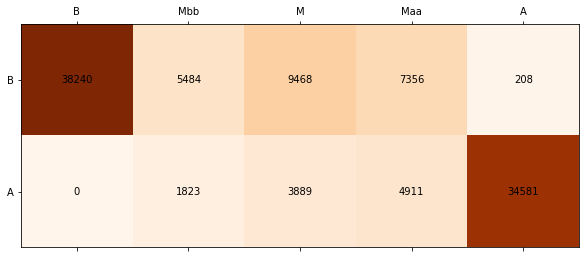

In [59]:
plt.matshow(mat, cmap="Oranges")
for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = plt.gca().text(j, i, int(mat[i, j]),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(["B", "A"]);

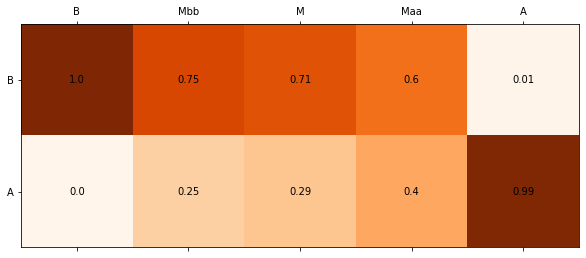

In [60]:
M = mat/ mat.sum(axis=0, keepdims=True)
plt.matshow(M, cmap="Oranges")
for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            text = plt.gca().text(j, i, np.round(M[i, j],2),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(["B", "A"]);

In [61]:
def between_cells(hmm_track1, hmm_track2, hmm):
    mask = (hmm_track1["E1"] == hmm_track1["E1"]) & (hmm_track2["E1"] == hmm_track2["E1"])
    track1= hmm_track1[mask]
    track2= hmm_track2[mask]
    
    size = len(track1[hmm].unique())
    mat = np.zeros((size, size))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] = ((track1[hmm]==i) & (track2[hmm]==j)).sum()
    
    return mat

In [62]:
def plot_mat(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(5,5))
    plt.matshow(mat, cmap="Oranges", fignum=1)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar(shrink = .7)
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, str(int(mat[i, j])) + ' %',
                               ha="center", va="center", color="black")

In [63]:
def plot_mat2(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(5,5))
    plt.matshow(mat, cmap="bwr", fignum=1,  vmin=0, vmax=2)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar(shrink = .7)
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, np.round(mat[i, j],2),
                               ha="center", va="center", color="black")

In [64]:
mat = between_cells(gm_df, im_df, "HMM3P")
mat = mat/mat.sum()*100

In [65]:
np.diag(mat).sum()/mat.sum() * 100

52.96330869465824

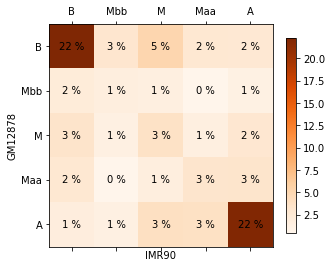

In [66]:
plot_mat(mat, ["B", "Mbb", "M", "Maa", "A"], "GM12878", "IMR90")
if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90'+'.svg', bbox_inches='tight')

In [67]:
p1 = mat.sum(axis=0, keepdims=True)
p1 = p1/p1.sum()
p2 = mat.sum(axis=1, keepdims=True)
p2 = p2/p2.sum()
mat2 = np.dot(p2, p1)
mat2*mat.sum()

array([[11.67351819,  2.82903877,  5.6827943 ,  4.2612375 , 11.59318873],
       [ 2.23591253,  0.54186605,  1.08846628,  0.81618533,  2.22052645],
       [ 4.09541919,  0.99251138,  1.99369414,  1.49496952,  4.06723721],
       [ 3.73690803,  0.90562738,  1.81916705,  1.36410056,  3.71119309],
       [10.64889207,  2.580724  ,  5.18399527,  3.88721356, 10.57561341]])

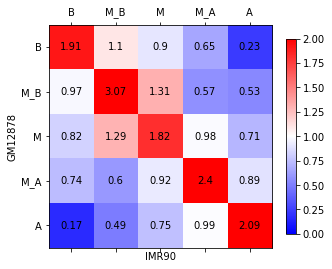

In [68]:
plot_mat2(mat/(mat2*mat.sum()), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")
if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90_enriched'+'.svg', bbox_inches='tight')

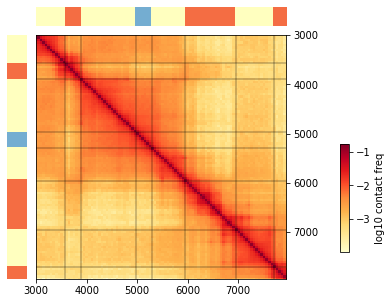

In [69]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_10kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/GM12878/4DNFIXP4QG5B.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3'
region1 = 'chr1:3,000,000-8,000,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'GM12878_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

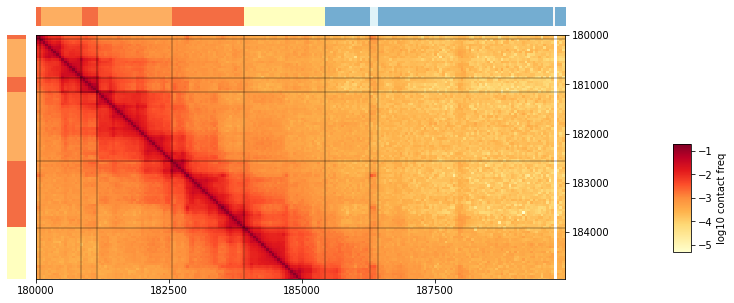

In [73]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/GM12878/4DNFIXP4QG5B.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:180,000,000-190,000,000'
region2 = 'chr1:180,000,000-185,000,000'
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'GM12878_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

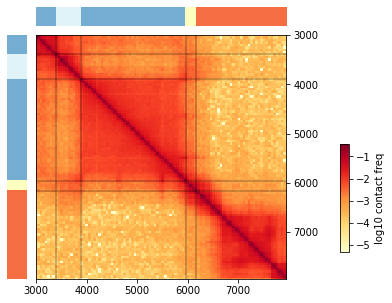

In [30]:
hmm_track = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/IMR90/4DNFIJTOIGOI.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:3,000,000-8,000,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'IMR90_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

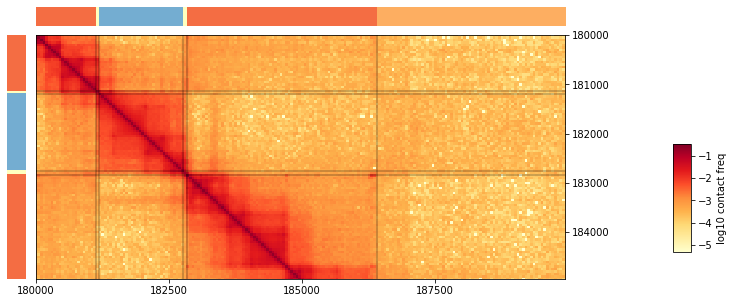

In [31]:
hmm_track = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/IMR90/4DNFIJTOIGOI.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:180,000,000-190,000,000'
region2 = 'chr1:180,000,000-185,000,000'
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'IMR90_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

In [22]:
chrom_hmm_dir = "//pollard/data/wynton/consortia/roadmap/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final"
gm_chrom =  chrom_hmm_dir+"/E116_15_coreMarks_hg38lift_dense.bed.gz"
im_chrom =  chrom_hmm_dir+"/E017_15_coreMarks_hg38lift_dense.bed.gz"

In [23]:
gm_chrom

'//pollard/data/wynton/consortia/roadmap/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/E116_15_coreMarks_hg38lift_dense.bed.gz'

In [24]:
import igv

b = igv.Browser({"genome": "hg38"})

b.load_track(
    {
        "name": "ChromHMM_GM12878",
        
        "type": "annotation",
         "format": "bed",
         "url": "https://egg2.wustl.edu/roadmap/data/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/download/E116_15_coreMarks_hg38lift_dense.bed.gz",
#         "type": "variant",
#         "indexed": False
    })

b.load_track(
    {
        "name": "ChromHMM_IMR90",
        
        "type": "annotation",
         "format": "bed",
         "url": "https://egg2.wustl.edu/roadmap/data/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/download/E017_15_coreMarks_hg38lift_dense.bed.gz",
#         "type": "variant",
#         "indexed": False
    })

b.load_track(
    {
        "name": "H4",
        
        "type": "wig",
         "format": "bigWig",
         "url": "https://www.encodeproject.org/files/ENCFF919DOR/@@download/ENCFF919DOR.bigWig",
#         "type": "variant",
#         "indexed": False
    })




In [25]:
b.show()
